In [2]:
import pandas as pd

In [3]:
auser = pd.read_csv('../../data/raw/aquifer/auser.csv')
print(auser.shape)
auser.head()

(8154, 27)


,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
auser.columns

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

In [5]:
cols_rain = [
    'Rainfall_Gallicano',
    'Rainfall_Pontetetto',
    'Rainfall_Monte_Serra',
    'Rainfall_Orentano',
    'Rainfall_Borgo_a_Mozzano',
    'Rainfall_Piaggione',
    'Rainfall_Calavorno',
    'Rainfall_Croce_Arcana',
    'Rainfall_Tereglio_Coreglia_Antelminelli',
    'Rainfall_Fabbriche_di_Vallico'
]

cols_depth = [
    'Depth_to_Groundwater_LT2',
    'Depth_to_Groundwater_SAL',
    'Depth_to_Groundwater_PAG',
    'Depth_to_Groundwater_CoS',
    'Depth_to_Groundwater_DIEC'
]

cols_temp = [
    'Temperature_Orentano',
    'Temperature_Monte_Serra',
    'Temperature_Ponte_a_Moriano',
    'Temperature_Lucca_Orto_Botanico'
]

cols_vol = [
    'Volume_POL',
    'Volume_CC1',
    'Volume_CC2',
    'Volume_CSA',
    'Volume_CSAL'
]

cols_hydro = [
    'Hydrometry_Monte_S_Quirico',
    'Hydrometry_Piaggione'
]

all_cols = [cols_rain, cols_depth, cols_temp, cols_vol, cols_hydro]
for x in all_cols:
    for c in x:
        auser[c]

In [6]:
auser['Date'] = pd.to_datetime(auser['Date'], format='%d/%m/%Y')

In [7]:
auser.isnull().sum()

Date                                          0
Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
Depth_to_Groundwater_LT2                   3352
Depth_to_Groundwater_SAL                   3609
Depth_to_Groundwater_PAG                   4347
Depth_to_Groundwater_CoS                   3839
Depth_to_Groundwater_DIEC                  4884
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

In [8]:
auser[auser['Hydrometry_Monte_S_Quirico'].isnull()]['Date']

0      1998-03-05
1      1998-03-06
2      1998-03-07
3      1998-03-08
4      1998-03-09
          ...    
5642   2013-08-15
5644   2013-08-17
5647   2013-08-20
7515   2018-10-01
7629   2019-01-23
Name: Date, Length: 913, dtype: datetime64[ns]

In [9]:
for x in all_cols:
    for c in x:
        print(c, '...', auser[~auser[c].isnull()]['Date'].values[0])

Rainfall_Gallicano ... 2006-01-01T00:00:00.000000000
Rainfall_Pontetetto ... 2006-01-01T00:00:00.000000000
Rainfall_Monte_Serra ... 2006-01-01T00:00:00.000000000
Rainfall_Orentano ... 2006-01-01T00:00:00.000000000
Rainfall_Borgo_a_Mozzano ... 2006-01-01T00:00:00.000000000
Rainfall_Piaggione ... 2006-01-01T00:00:00.000000000
Rainfall_Calavorno ... 2006-01-01T00:00:00.000000000
Rainfall_Croce_Arcana ... 2006-01-01T00:00:00.000000000
Rainfall_Tereglio_Coreglia_Antelminelli ... 2006-01-01T00:00:00.000000000
Rainfall_Fabbriche_di_Vallico ... 2006-01-01T00:00:00.000000000
Depth_to_Groundwater_LT2 ... 2006-01-01T00:00:00.000000000
Depth_to_Groundwater_SAL ... 2007-04-06T00:00:00.000000000
Depth_to_Groundwater_PAG ... 2009-01-01T00:00:00.000000000
Depth_to_Groundwater_CoS ... 2006-06-29T00:00:00.000000000
Depth_to_Groundwater_DIEC ... 2011-01-02T00:00:00.000000000
Temperature_Orentano ... 1998-03-05T00:00:00.000000000
Temperature_Monte_Serra ... 1998-03-05T00:00:00.000000000
Temperature_Ponte_

In [10]:
from datetime import datetime
auser = auser[auser['Date'] > datetime(1999, 12, 31)]

In [11]:
auser.isnull().sum()

Date                                          0
Rainfall_Gallicano                         2192
Rainfall_Pontetetto                        2192
Rainfall_Monte_Serra                       2198
Rainfall_Orentano                          2192
Rainfall_Borgo_a_Mozzano                   2192
Rainfall_Piaggione                         2557
Rainfall_Calavorno                         2192
Rainfall_Croce_Arcana                      2192
Rainfall_Tereglio_Coreglia_Antelminelli    2192
Rainfall_Fabbriche_di_Vallico              2192
Depth_to_Groundwater_LT2                   2685
Depth_to_Groundwater_SAL                   2942
Depth_to_Groundwater_PAG                   3680
Depth_to_Groundwater_CoS                   3172
Depth_to_Groundwater_DIEC                  4217
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

In [12]:
auser[auser['Hydrometry_Monte_S_Quirico'].isnull()]['Date']

839    2000-06-21
840    2000-06-22
841    2000-06-23
842    2000-06-24
843    2000-06-25
          ...    
5642   2013-08-15
5644   2013-08-17
5647   2013-08-20
7515   2018-10-01
7629   2019-01-23
Name: Date, Length: 246, dtype: datetime64[ns]

In [13]:
# BOTH HYDROMETRIES
#
# 6/21/00 - 6/25/00 (Quirico includes 6/26)
# 8/5/00 - 12/31/00
# 10/25/07 (Quirico includes 10/26 - 10/30)
# 10/17/08 - 12/31/08

# MISSING IN QUIRICO
# 8/3, 8/4, 8/11, 8/12, 8/15, 8/17, 8/20/13
# 10/1/18
# 1/23/19

for d in auser[auser['Hydrometry_Monte_S_Quirico'].isnull()]['Date']:
    print(d)

2000-06-21 00:00:00
2000-06-22 00:00:00
2000-06-23 00:00:00
2000-06-24 00:00:00
2000-06-25 00:00:00
2000-06-26 00:00:00
2000-08-05 00:00:00
2000-08-06 00:00:00
2000-08-07 00:00:00
2000-08-08 00:00:00
2000-08-09 00:00:00
2000-08-10 00:00:00
2000-08-11 00:00:00
2000-08-12 00:00:00
2000-08-13 00:00:00
2000-08-14 00:00:00
2000-08-15 00:00:00
2000-08-16 00:00:00
2000-08-17 00:00:00
2000-08-18 00:00:00
2000-08-19 00:00:00
2000-08-20 00:00:00
2000-08-21 00:00:00
2000-08-22 00:00:00
2000-08-23 00:00:00
2000-08-24 00:00:00
2000-08-25 00:00:00
2000-08-26 00:00:00
2000-08-27 00:00:00
2000-08-28 00:00:00
2000-08-29 00:00:00
2000-08-30 00:00:00
2000-08-31 00:00:00
2000-09-01 00:00:00
2000-09-02 00:00:00
2000-09-03 00:00:00
2000-09-04 00:00:00
2000-09-05 00:00:00
2000-09-06 00:00:00
2000-09-07 00:00:00
2000-09-08 00:00:00
2000-09-09 00:00:00
2000-09-10 00:00:00
2000-09-11 00:00:00
2000-09-12 00:00:00
2000-09-13 00:00:00
2000-09-14 00:00:00
2000-09-15 00:00:00
2000-09-16 00:00:00
2000-09-17 00:00:00


In [14]:
auser[auser['Hydrometry_Piaggione'].isnull()]['Date'].isin(auser[auser['Hydrometry_Monte_S_Quirico'].isnull()]['Date']).sum()

231

In [15]:
null_hydro_a = auser[auser['Hydrometry_Monte_S_Quirico'].isnull()]['Date'].values
null_hydro_b = auser[auser['Hydrometry_Piaggione'].isnull()]['Date'].values

In [16]:
null_hydro_ab = auser[auser['Hydrometry_Monte_S_Quirico'].isnull() & auser['Hydrometry_Piaggione'].isnull()]['Date'].values

In [17]:
null_hydro_a = [d for d in null_hydro_a if d not in null_hydro_ab]
null_hydro_b = [d for d in null_hydro_b if d not in null_hydro_ab]

In [18]:
null_hydro_a

[numpy.datetime64('2000-06-26T00:00:00.000000000'),
 numpy.datetime64('2007-10-26T00:00:00.000000000'),
 numpy.datetime64('2007-10-27T00:00:00.000000000'),
 numpy.datetime64('2007-10-28T00:00:00.000000000'),
 numpy.datetime64('2007-10-29T00:00:00.000000000'),
 numpy.datetime64('2007-10-30T00:00:00.000000000'),
 numpy.datetime64('2013-08-03T00:00:00.000000000'),
 numpy.datetime64('2013-08-04T00:00:00.000000000'),
 numpy.datetime64('2013-08-11T00:00:00.000000000'),
 numpy.datetime64('2013-08-12T00:00:00.000000000'),
 numpy.datetime64('2013-08-15T00:00:00.000000000'),
 numpy.datetime64('2013-08-17T00:00:00.000000000'),
 numpy.datetime64('2013-08-20T00:00:00.000000000'),
 numpy.datetime64('2018-10-01T00:00:00.000000000'),
 numpy.datetime64('2019-01-23T00:00:00.000000000')]

In [19]:
len(null_hydro_b)

1137

In [20]:
null_hydro_ab

array(['2000-06-21T00:00:00.000000000', '2000-06-22T00:00:00.000000000',
       '2000-06-23T00:00:00.000000000', '2000-06-24T00:00:00.000000000',
       '2000-06-25T00:00:00.000000000', '2000-08-05T00:00:00.000000000',
       '2000-08-06T00:00:00.000000000', '2000-08-07T00:00:00.000000000',
       '2000-08-08T00:00:00.000000000', '2000-08-09T00:00:00.000000000',
       '2000-08-10T00:00:00.000000000', '2000-08-11T00:00:00.000000000',
       '2000-08-12T00:00:00.000000000', '2000-08-13T00:00:00.000000000',
       '2000-08-14T00:00:00.000000000', '2000-08-15T00:00:00.000000000',
       '2000-08-16T00:00:00.000000000', '2000-08-17T00:00:00.000000000',
       '2000-08-18T00:00:00.000000000', '2000-08-19T00:00:00.000000000',
       '2000-08-20T00:00:00.000000000', '2000-08-21T00:00:00.000000000',
       '2000-08-22T00:00:00.000000000', '2000-08-23T00:00:00.000000000',
       '2000-08-24T00:00:00.000000000', '2000-08-25T00:00:00.000000000',
       '2000-08-26T00:00:00.000000000', '2000-08-27

In [21]:
pd.Series(null_hydro_b).describe(datetime_is_numeric=True)

count                             1137
mean     2008-10-31 03:01:06.490765056
min                2001-01-22 00:00:00
25%                2007-09-28 00:00:00
50%                2009-06-18 00:00:00
75%                2010-03-29 00:00:00
max                2020-05-05 00:00:00
dtype: object

In [22]:
null_hydro_b[:20]

[numpy.datetime64('2001-01-22T00:00:00.000000000'),
 numpy.datetime64('2001-01-23T00:00:00.000000000'),
 numpy.datetime64('2001-01-24T00:00:00.000000000'),
 numpy.datetime64('2001-01-25T00:00:00.000000000'),
 numpy.datetime64('2001-01-26T00:00:00.000000000'),
 numpy.datetime64('2001-01-27T00:00:00.000000000'),
 numpy.datetime64('2001-01-28T00:00:00.000000000'),
 numpy.datetime64('2003-08-30T00:00:00.000000000'),
 numpy.datetime64('2003-08-31T00:00:00.000000000'),
 numpy.datetime64('2003-09-01T00:00:00.000000000'),
 numpy.datetime64('2003-09-02T00:00:00.000000000'),
 numpy.datetime64('2003-09-03T00:00:00.000000000'),
 numpy.datetime64('2003-09-04T00:00:00.000000000'),
 numpy.datetime64('2003-09-05T00:00:00.000000000'),
 numpy.datetime64('2003-09-06T00:00:00.000000000'),
 numpy.datetime64('2003-09-07T00:00:00.000000000'),
 numpy.datetime64('2003-09-08T00:00:00.000000000'),
 numpy.datetime64('2003-09-09T00:00:00.000000000'),
 numpy.datetime64('2003-09-10T00:00:00.000000000'),
 numpy.datet

In [30]:
pd.Timestamp(null_hydro_b[0]).day

22

In [31]:
def ts_success(a, b):
    return (b - a).days == 1

In [33]:
ranges = []
curr = None
for d in null_hydro_b:
    ts = pd.Timestamp(d)
    if curr is None:
        curr = [d]
    else:
        last = curr[-1]
        if ts_success(last, ts):
            curr.append(d)
        else:
            ranges.append(curr)
            curr = [d]
ranges.append(curr)

In [36]:
[len(_) for _ in ranges]

[7, 25, 109, 57, 7, 88, 107, 730, 1, 1, 1, 1, 1, 1, 1]

In [45]:
for r in ranges:
    print(r[-1])

2001-01-28T00:00:00.000000000
2003-09-23T00:00:00.000000000
2005-04-19T00:00:00.000000000
2005-09-13T00:00:00.000000000
2007-01-07T00:00:00.000000000
2007-10-06T00:00:00.000000000
2008-10-16T00:00:00.000000000
2010-12-31T00:00:00.000000000
2013-04-21T00:00:00.000000000
2013-04-26T00:00:00.000000000
2014-01-29T00:00:00.000000000
2014-06-25T00:00:00.000000000
2019-01-08T00:00:00.000000000
2019-09-27T00:00:00.000000000
2020-05-05T00:00:00.000000000


In [50]:
r2 = [[pd.Timestamp(r[0]).strftime('%D'), pd.Timestamp(r[-1]).strftime('%D')] for r in ranges]
r2 = [r if r[0] != r[1] else [r[0]] for r in r2]
r2 = [r[0] if len(r) == 1 else f"{r[0]} - {r[1]}" for r in r2]
r2

['01/22/01 - 01/28/01',
 '08/30/03 - 09/23/03',
 '01/01/05 - 04/19/05',
 '07/19/05 - 09/13/05',
 '01/01/07 - 01/07/07',
 '07/11/07 - 10/06/07',
 '07/02/08 - 10/16/08',
 '01/01/09 - 12/31/10',
 '04/21/13',
 '04/26/13',
 '01/29/14',
 '06/25/14',
 '01/08/19',
 '09/27/19',
 '05/05/20']

In [71]:
def ts_success(a, b):
    return (b - a).days == 1

def date_of_null(s):
    r = []
    curr = None
    for d in s:
        try:
            pd.Timestamp(d).strftime('%D')
        except TypeError:
            print(d)
            continue
        if d is None:
            continue
        if curr is None:
            curr = [d]
        else:
            last = curr[-1]
            if ts_success(pd.Timestamp(last), pd.Timestamp(d)):
                curr.append(d)
            else:
                r.append(curr)
                curr = [d]
    r.append(curr)
    if len(r) == 1 and r[0] is None:
        return []
    for x in r:
        try:
            pd.Timestamp(x[0]).strftime('%D')
        except TypeError:
            print(r)
    r = [[pd.Timestamp(d[0]).strftime('%D'), pd.Timestamp(d[-1]).strftime('%D')] for d in r]
    r = [d if d[0] != d[1] else [d[0]] for d in r]
    r = [d[0] if len(d) == 1 else f"{d[0]}—{d[1]}" for d in r]
    return r

def find_null_dates(df, col, date_col='Date'):
    return date_of_null(df[df[col].isnull()][date_col].values)

find_null_dates(auser, 'Hydrometry_Monte_S_Quirico')

['06/21/00—06/26/00',
 '08/05/00—12/31/00',
 '10/25/07—10/30/07',
 '10/17/08—12/31/08',
 '08/03/13—08/04/13',
 '08/11/13—08/12/13',
 '08/15/13',
 '08/17/13',
 '08/20/13',
 '10/01/18',
 '01/23/19']

In [76]:
for c in auser.columns:
    print(c)
    for d in find_null_dates(auser, c):
        print('\t', d)
    print()

Date

Rainfall_Gallicano
	 01/01/00—12/31/05

Rainfall_Pontetetto
	 01/01/00—12/31/05

Rainfall_Monte_Serra
	 01/01/00—12/31/05
	 02/01/12
	 02/03/12—02/04/12
	 02/10/12—02/11/12
	 02/15/12

Rainfall_Orentano
	 01/01/00—12/31/05

Rainfall_Borgo_a_Mozzano
	 01/01/00—12/31/05

Rainfall_Piaggione
	 01/01/00—12/31/05
	 01/01/09—12/31/09

Rainfall_Calavorno
	 01/01/00—12/31/05

Rainfall_Croce_Arcana
	 01/01/00—12/31/05

Rainfall_Tereglio_Coreglia_Antelminelli
	 01/01/00—12/31/05

Rainfall_Fabbriche_di_Vallico
	 01/01/00—12/31/05

Depth_to_Groundwater_LT2
	 01/01/00—12/31/05
	 11/18/07
	 12/25/09—12/31/09
	 12/24/10—12/31/10
	 02/10/11—05/16/11
	 02/03/12—02/04/12
	 02/21/12—05/28/12
	 07/04/12—08/08/12
	 10/23/14—11/19/14
	 08/19/15—08/20/15
	 12/20/15
	 01/20/16—01/28/16
	 01/30/16—02/16/16
	 02/18/16—02/23/16
	 02/25/16—02/28/16
	 03/01/16—03/08/16
	 03/10/16—03/14/16
	 03/16/16—03/22/16
	 03/24/16—03/28/16
	 03/31/16—04/05/16
	 04/07/16—04/11/16
	 04/13/16—04/20/16
	 04/22/16—04/27/16
	 

In [ ]:
# Rainfall Features ::

# "JUST START AT 2006"
#   Gallicano
#   Pontetetto
#   Orentano
#   Borgo a Mozzano
#   Calavorno
#   Croce Arcana
#   Tereglio Coreglia Antelminelli
#   Fabbriche di Vallico

# "LITTLE EXTRA WORK"
#   Monte Serra: some missing days from 2/2012
#   Piaggione: all of 2009

In [ ]:
# Volume Features ::

# "JUST START AT 2005"

In [ ]:
# Hydrometry Features ::

# Monte S Quirico: Late 00, Late 08
# Piaggione: Late 00, 9/03, Early 05, Mid 05, Mid 07, Late 08-2010

In [ ]:
# Depth to Groundwater Features ::

# PAG: Nothing until 09, Mid 11, Late 12, Late 13, Mid 14
# DIEC: Nothing until 11, Late 14, Late 18, Early 20

In [ ]:
# Depth to Groundwater TARGETS ::

# LT2: (06) Early 11, Early 12, Mid 12, Late 14, Early/Mid 16
# SAL: (4/07) Mid 09, Late 16
# CoS: (7/06) Late 07, Late 10/Early 11, Early 14, Mid 14, Early 15, Late 18

In [80]:
def pernullcent(s):
    return len(s[s.isnull()]) / len(s)

def getpernullcent(df):
    for c in df.columns:
        print(c, '::', pernullcent(df[c]))

getpernullcent(auser)

Date :: 0.0
Rainfall_Gallicano :: 0.29277414184586614
Rainfall_Pontetetto :: 0.29277414184586614
Rainfall_Monte_Serra :: 0.2935755309202618
Rainfall_Orentano :: 0.29277414184586614
Rainfall_Borgo_a_Mozzano :: 0.29277414184586614
Rainfall_Piaggione :: 0.34152531053826635
Rainfall_Calavorno :: 0.29277414184586614
Rainfall_Croce_Arcana :: 0.29277414184586614
Rainfall_Tereglio_Coreglia_Antelminelli :: 0.29277414184586614
Rainfall_Fabbriche_di_Vallico :: 0.29277414184586614
Depth_to_Groundwater_LT2 :: 0.3586216107920395
Depth_to_Groundwater_SAL :: 0.39294777614531856
Depth_to_Groundwater_PAG :: 0.4915186322959797
Depth_to_Groundwater_CoS :: 0.42366769066381726
Depth_to_Groundwater_DIEC :: 0.5632429544543877
Temperature_Orentano :: 0.0
Temperature_Monte_Serra :: 0.0
Temperature_Ponte_a_Moriano :: 0.0
Temperature_Lucca_Orto_Botanico :: 0.0
Volume_POL :: 0.244022973153466
Volume_CC1 :: 0.244022973153466
Volume_CC2 :: 0.244022973153466
Volume_CSA :: 0.244022973153466
Volume_CSAL :: 0.2440229731

In [81]:
auser = auser[auser['Date'] > datetime(2007, 4, 5)]
auser = auser.drop(['Depth_to_Groundwater_DIEC', 'Depth_to_Groundwater_PAG'], axis=1)
getpernullcent(auser)

Date :: 0.0
Rainfall_Gallicano :: 0.0
Rainfall_Pontetetto :: 0.0
Rainfall_Monte_Serra :: 0.0012409513960703205
Rainfall_Orentano :: 0.0
Rainfall_Borgo_a_Mozzano :: 0.0
Rainfall_Piaggione :: 0.07549120992761117
Rainfall_Calavorno :: 0.0
Rainfall_Croce_Arcana :: 0.0
Rainfall_Tereglio_Coreglia_Antelminelli :: 0.0
Rainfall_Fabbriche_di_Vallico :: 0.0
Depth_to_Groundwater_LT2 :: 0.10196483971044468
Depth_to_Groundwater_SAL :: 0.05997931747673216
Depth_to_Groundwater_CoS :: 0.1656670113753878
Temperature_Orentano :: 0.0
Temperature_Monte_Serra :: 0.0
Temperature_Ponte_a_Moriano :: 0.0
Temperature_Lucca_Orto_Botanico :: 0.0
Volume_POL :: 0.0
Volume_CC1 :: 0.0
Volume_CC2 :: 0.0
Volume_CSA :: 0.0
Volume_CSAL :: 0.0
Hydrometry_Monte_S_Quirico :: 0.018821096173733197
Hydrometry_Piaggione :: 0.20868665977249223


In [82]:
auser = auser.drop('Hydrometry_Piaggione', axis=1)
auser.isnull().sum()

Date                                         0
Rainfall_Gallicano                           0
Rainfall_Pontetetto                          0
Rainfall_Monte_Serra                         6
Rainfall_Orentano                            0
Rainfall_Borgo_a_Mozzano                     0
Rainfall_Piaggione                         365
Rainfall_Calavorno                           0
Rainfall_Croce_Arcana                        0
Rainfall_Tereglio_Coreglia_Antelminelli      0
Rainfall_Fabbriche_di_Vallico                0
Depth_to_Groundwater_LT2                   493
Depth_to_Groundwater_SAL                   290
Depth_to_Groundwater_CoS                   801
Temperature_Orentano                         0
Temperature_Monte_Serra                      0
Temperature_Ponte_a_Moriano                  0
Temperature_Lucca_Orto_Botanico              0
Volume_POL                                   0
Volume_CC1                                   0
Volume_CC2                                   0
Volume_CSA   

In [86]:
# they said to only use absolute values

TypeError: bad operand type for abs(): 'Timestamp'

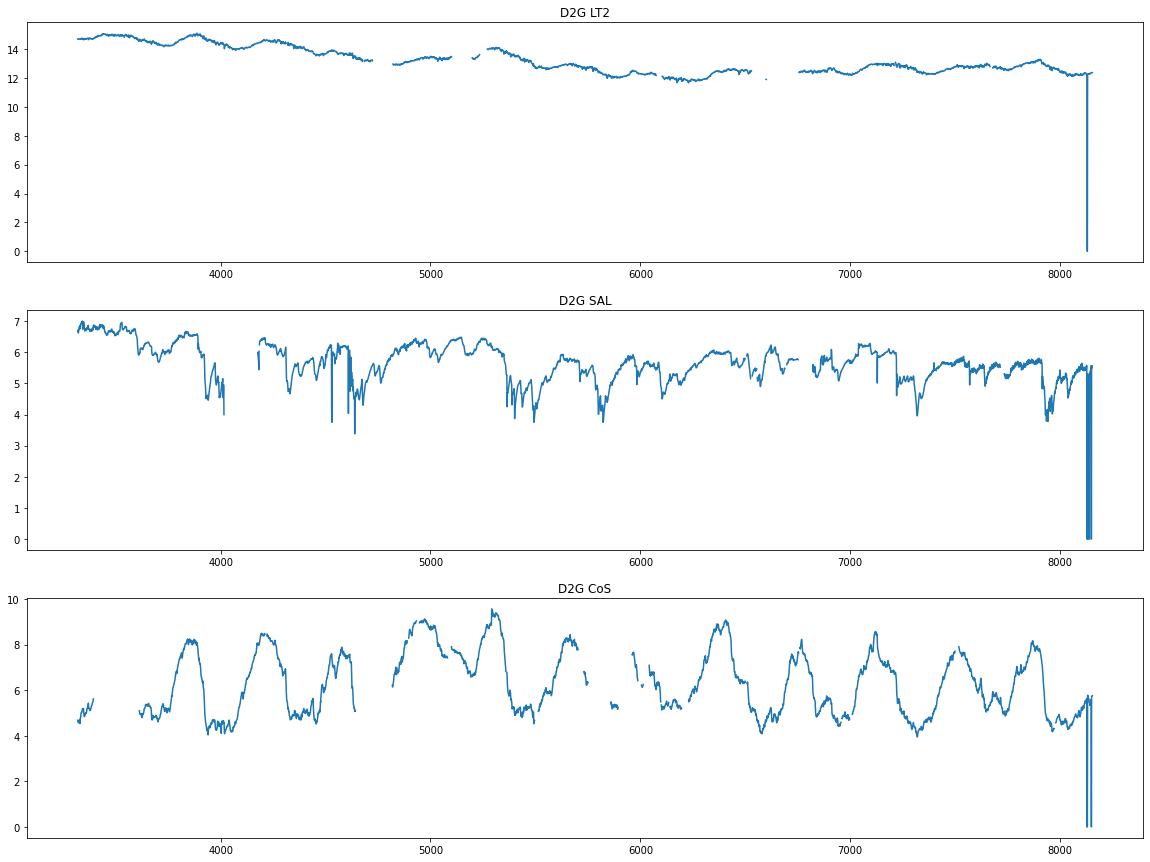

In [87]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(20,15))
axs[0].plot(auser['Depth_to_Groundwater_LT2'].abs())
axs[0].set_title('D2G LT2')
axs[1].plot(auser['Depth_to_Groundwater_SAL'].abs())
axs[1].set_title('D2G SAL')
axs[2].plot(auser['Depth_to_Groundwater_CoS'].abs())
axs[2].set_title('D2G CoS')
plt.show()

In [91]:
# some of these columns clearly have 0 for null
#(auser['Depth_to_Groundwater_LT2'] == 0).sum() // 2
#(auser['Depth_to_Groundwater_SAL'] == 0).sum()  // 10
#(auser['Depth_to_Groundwater_CoS'] == 0).sum()  // 4

4

In [92]:
auser['Depth_to_Groundwater_LT2'] = auser['Depth_to_Groundwater_LT2'].replace(0, float('nan'))
auser['Depth_to_Groundwater_SAL'] = auser['Depth_to_Groundwater_SAL'].replace(0, float('nan'))
auser['Depth_to_Groundwater_CoS'] = auser['Depth_to_Groundwater_CoS'].replace(0, float('nan'))

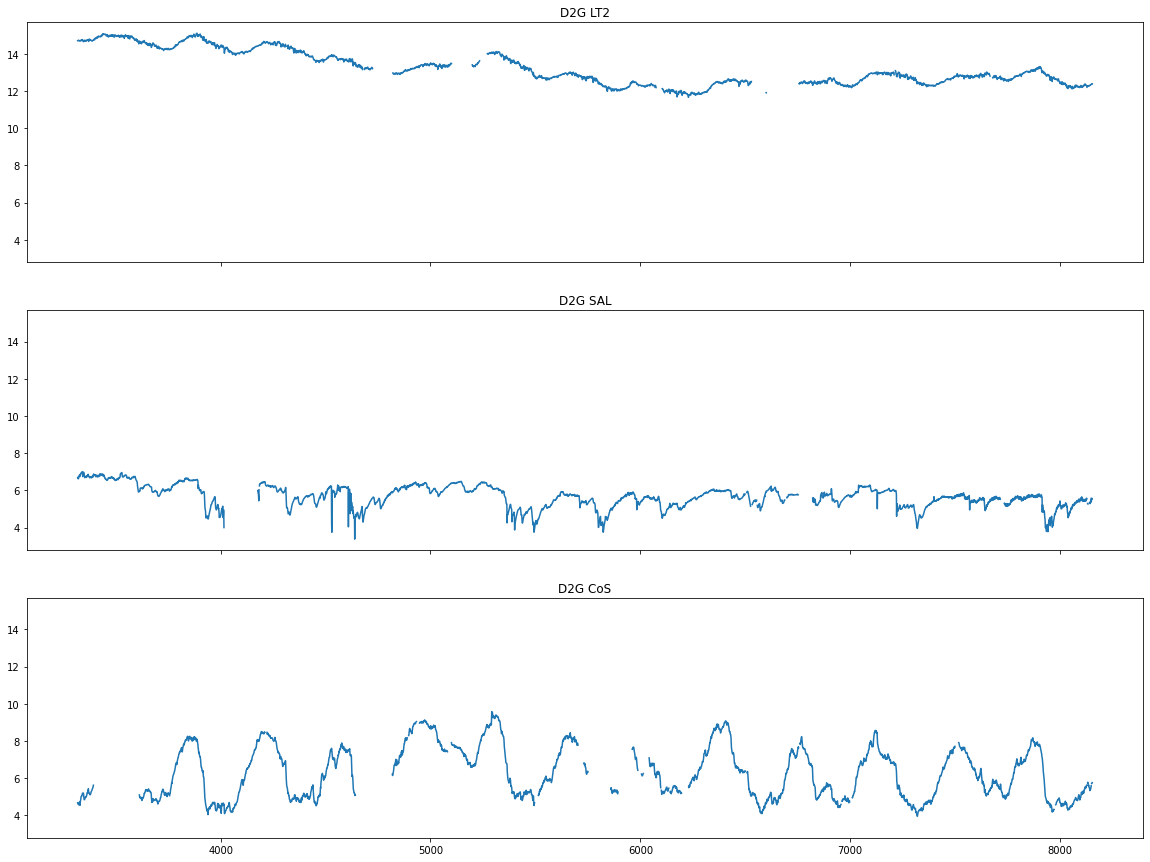

In [93]:
fig, axs = plt.subplots(3, 1, figsize=(20,15), sharex=True, sharey=True)
axs[0].plot(auser['Depth_to_Groundwater_LT2'].abs())
axs[0].set_title('D2G LT2')
axs[1].plot(auser['Depth_to_Groundwater_SAL'].abs())
axs[1].set_title('D2G SAL')
axs[2].plot(auser['Depth_to_Groundwater_CoS'].abs())
axs[2].set_title('D2G CoS')
plt.show()